In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier


In [ ]:
file_path = r"/content/2023_nba_player_stats(4).csv"
data = pd.read_csv(file_path)

In [ ]:
data['WinRate'] = data['W'] / data['GP']
team_features = data.groupby('Team').agg({
    'FP': ['mean', 'std'],
    'WinRate': 'mean',
    'PTS': 'mean',
    'AST': 'mean',
    'STL': 'mean'
}).reset_index()
team_features.columns = ['Team', 'FP_Mean', 'FP_Std', 'WinRate', 'PTS_Mean', 'AST_Mean', 'STL_Mean']

In [ ]:
np.random.seed(42)
team_features['Champion'] = np.random.randint(0, 2, size=team_features.shape[0])

In [ ]:
X = team_features[['FP_Mean', 'FP_Std', 'WinRate', 'PTS_Mean', 'AST_Mean', 'STL_Mean']]
y = team_features['Champion']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.2f}")

XGBoost Model Accuracy: 0.67


In [19]:
print(team_features.columns)

Index(['Team', 'FP_Mean', 'FP_Std', 'WinRate', 'PTS_Mean', 'AST_Mean',
       'STL_Mean', 'Champion'],
      dtype='object')


In [20]:
print(X.head())
print(xgb_model)

       FP_Mean       FP_Std   WinRate    PTS_Mean    AST_Mean   STL_Mean
0  1156.444444  1005.872125  0.476864  590.277778  118.888889  36.055556
1   973.500000   880.106303  0.504204  469.950000  110.000000  33.150000
2  1099.666667  1038.705189  0.699277  552.333333  123.611111  29.555556
3   918.000000   711.137909  0.313895  461.117647  102.764706  31.411765
4  1104.705882  1073.276628  0.496596  547.470588  117.352941  39.764706
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
          

In [21]:
team_features['Win_Prob'] = xgb_model.predict_proba(X)[:, 1]
print(team_features[['Team', 'Win_Prob']].head())

  Team  Win_Prob
0  ATL  0.022495
1  BKN  0.994465
2  BOS  0.170513
3  CHA  0.306837
4  CHI  0.034664


<ipython-input-22-47de9bd605cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Win_Prob', data=team_features, palette='viridis')


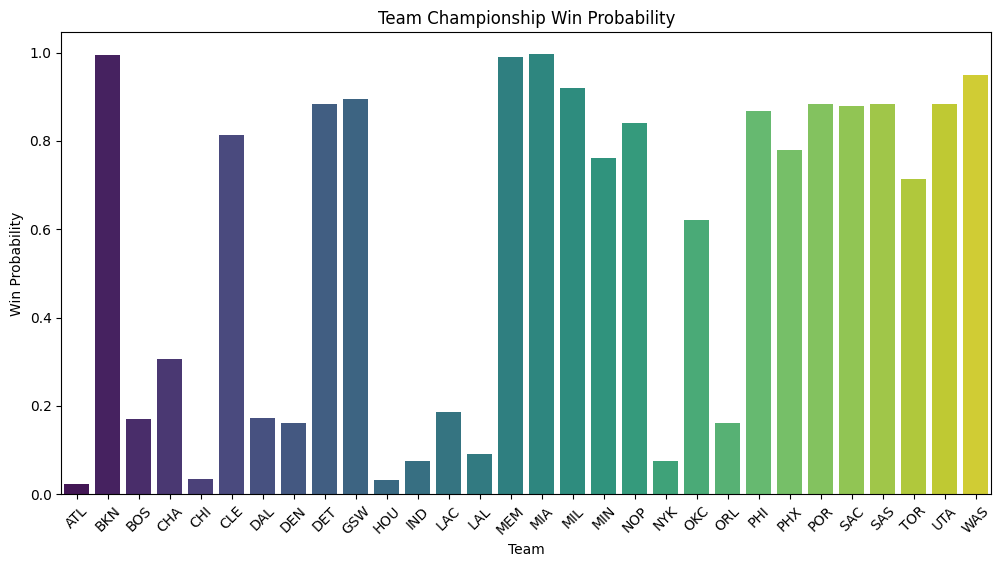

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Win_Prob', data=team_features, palette='viridis')
plt.title("Team Championship Win Probability")
plt.xlabel("Team")
plt.ylabel("Win Probability")
plt.xticks(rotation=45)
plt.show()

In [24]:
top_players = data.groupby('Team').apply(
    lambda x: x.nlargest(5, 'PTS')
).reset_index(drop=True)

<ipython-input-24-0aa21e2aa9fb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = data.groupby('Team').apply(


In [25]:
team_scores = top_players.groupby('Team').agg({
    '+/-': 'mean'
}).reset_index()
team_scores.rename(columns={'+/-': 'Team_Score'}, inplace=True)


In [26]:
min_score = team_scores['Team_Score'].min()
max_score = team_scores['Team_Score'].max()
team_scores['Normalized_Score'] = (
    (team_scores['Team_Score'] - min_score) / (max_score - min_score) * 100
)

In [29]:
team_scores = team_scores.sort_values(by='Normalized_Score', ascending=False)

In [30]:
print(team_scores)

   Team  Team_Score  Normalized_Score
7   DEN       381.4        100.000000
5   CLE       330.8         93.517807
2   BOS       327.2         93.056623
16  MIL       292.8         88.649757
22  PHI       268.0         85.472713
14  MEM       264.8         85.062772
25  SAC       186.6         75.044837
19  NYK       152.8         70.714835
23  PHX       132.2         68.075839
13  LAL       126.2         67.307200
27  TOR       114.6         65.821163
9   GSW        98.2         63.720215
1   BKN        76.0         60.876249
6   DAL        75.4         60.799385
18  NOP        66.4         59.646426
20  OKC        47.6         57.238022
15  MIA        36.0         55.751986
28  UTA        35.2         55.649500
17  MIN        18.4         53.497310
4   CHI        13.2         52.831156
12  LAC        -7.4         50.192160
29  WAS       -16.2         49.064822
0   ATL       -29.6         47.348194
24  POR       -58.6         43.633103
21  ORL       -72.4         41.865232
11  IND     

<ipython-input-31-2c80c146ed89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Normalized_Score', data=team_scores, palette='coolwarm')


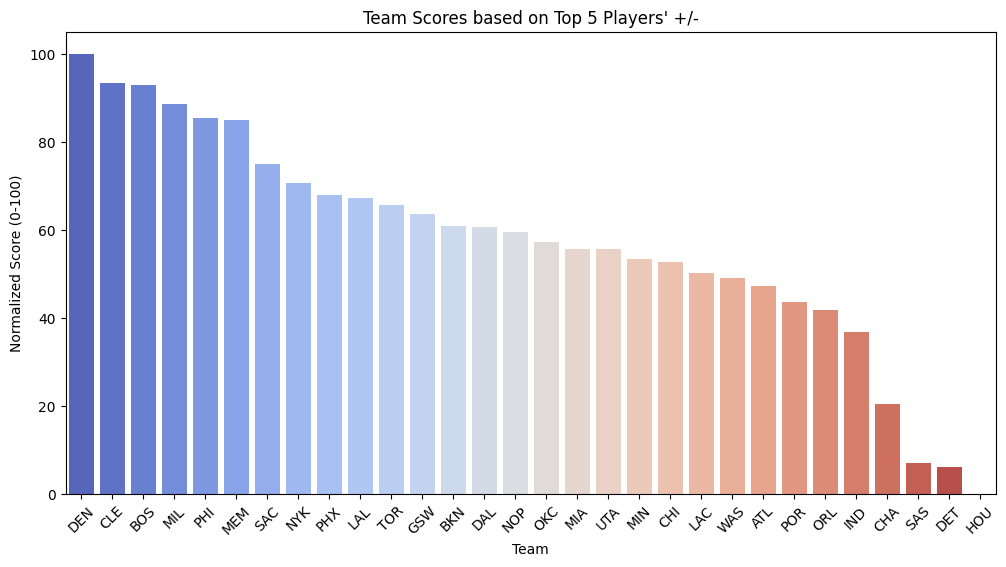

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Normalized_Score', data=team_scores, palette='coolwarm')
plt.title("Team Scores based on Top 5 Players' +/-")
plt.xlabel("Team")
plt.ylabel("Normalized Score (0-100)")
plt.xticks(rotation=45)
plt.show()